# **0.IMPORTING LIBRARIES**

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from tabulate import tabulate
from wordcloud import WordCloud
import geopandas as gpd
import folium
from folium.plugins import MarkerCluster
from branca.colormap import linear
import time 
import warnings
warnings.filterwarnings('ignore')

# **LOADING DATA**

In [2]:
business=pd.read_parquet('/kaggle/input/yelp-parquet/yelp_academic_dataset_business.parquet')
print(f'Business dataset has {business.shape[0]} rows and {business.shape[1]} columns.')

Business dataset has 150346 rows and 12 columns.


In [3]:
review=pd.read_parquet('/kaggle/input/yelp-parquet/yelp_academic_dataset_review.parquet')
print(f'Review dataset has {review.shape[0]} rows and {review.shape[1]} columns.')

Review dataset has 6990280 rows and 9 columns.


In [62]:
checkin=pd.read_parquet('/kaggle/input/yelp-parquet/yelp_academic_dataset_checkin.parquet')
print(f'Checkin dataset has {checkin.shape[0]} rows and {checkin.shape[1]} columns.')

Checkin dataset has 131930 rows and 2 columns.


In [5]:
user=pd.read_parquet('/kaggle/input/yelp-parquet/yelp_academic_dataset_user.parquet')
print(f'User dataset has {user.shape[0]} rows and {user.shape[1]} columns.')

User dataset has 1987897 rows and 22 columns.


# **BUSINESS DATASET**

In [6]:
business.head()

,business_id,name,address,city,state,postal_code,latitude,longitude,stars,review_count,is_open,categories
0,Pns2l4eNsfO8kk83dixA6A,"Abby Rappoport, LAC, CMQ","1616 Chapala St, Ste 2",Santa Barbara,CA,93101,34.426679,-119.711197,5.0,7,0,"Doctors, Traditional Chinese Medicine, Naturop..."
1,mpf3x-BjTdTEA3yCZrAYPw,The UPS Store,87 Grasso Plaza Shopping Center,Affton,MO,63123,38.551126,-90.335695,3.0,15,1,"Shipping Centers, Local Services, Notaries, Ma..."
2,tUFrWirKiKi_TAnsVWINQQ,Target,5255 E Broadway Blvd,Tucson,AZ,85711,32.223236,-110.880452,3.5,22,0,"Department Stores, Shopping, Fashion, Home & G..."
3,MTSW4McQd7CbVtyjqoe9mw,St Honore Pastries,935 Race St,Philadelphia,PA,19107,39.955505,-75.155564,4.0,80,1,"Restaurants, Food, Bubble Tea, Coffee & Tea, B..."
4,mWMc6_wTdE0EUBKIGXDVfA,Perkiomen Valley Brewery,101 Walnut St,Green Lane,PA,18054,40.338183,-75.471659,4.5,13,1,"Brewpubs, Breweries, Food"


In [7]:
business.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150346 entries, 0 to 150345
Data columns (total 12 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   business_id   150346 non-null  object 
 1   name          150346 non-null  object 
 2   address       150346 non-null  object 
 3   city          150346 non-null  object 
 4   state         150346 non-null  object 
 5   postal_code   150346 non-null  object 
 6   latitude      150346 non-null  float64
 7   longitude     150346 non-null  float64
 8   stars         150346 non-null  float64
 9   review_count  150346 non-null  int64  
 10  is_open       150346 non-null  int64  
 11  categories    150243 non-null  object 
dtypes: float64(3), int64(2), object(7)
memory usage: 13.8+ MB


In [8]:
business.describe()

,latitude,longitude,stars,review_count,is_open
count,150346.000000,150346.000000,150346.000000,150346.000000,150346.00000
mean,36.671150,-89.357339,3.596724,44.866561,0.79615
std,5.872759,14.918502,0.974421,121.120136,0.40286
min,27.555127,-120.095137,1.000000,5.000000,0.00000
25%,32.187293,-90.357810,3.000000,8.000000,1.00000
50%,38.777413,-86.121179,3.500000,15.000000,1.00000
75%,39.954036,-75.421542,4.500000,37.000000,1.00000
max,53.679197,-73.200457,5.000000,7568.000000,1.00000


In [9]:
print(business.isnull().sum())

business_id       0
name              0
address           0
city              0
state             0
postal_code       0
latitude          0
longitude         0
stars             0
review_count      0
is_open           0
categories      103
dtype: int64


In [10]:
business['categories'].fillna('Miscellaneous', inplace=True)

In [11]:
distinct_values_per_column_business =business[['city','state','stars','review_count','is_open']].nunique()

print("Total number of distinct values in each column:\n")
print(distinct_values_per_column_business)

Total number of distinct values in each column:

city            1416
state             27
stars              9
review_count    1158
is_open            2
dtype: int64


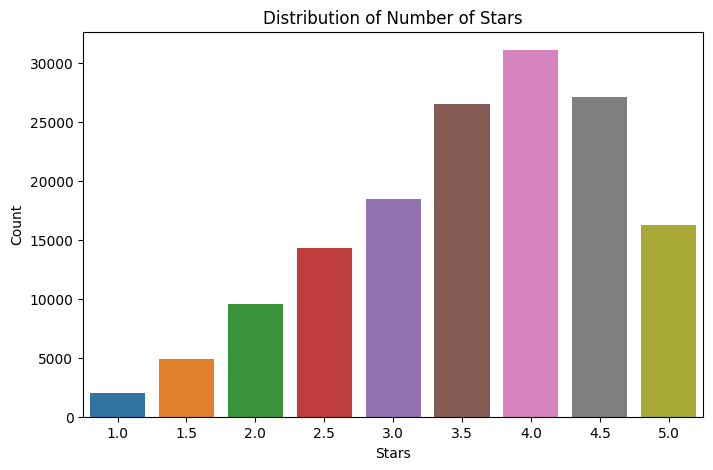

In [12]:
stars_counts = business['stars'].value_counts().sort_index()

plt.figure(figsize=(8,5))
sns.barplot(x=stars_counts.index, y=stars_counts.values)
plt.title('Distribution of Number of Stars')
plt.xlabel('Stars')
plt.ylabel('Count')
plt.show()

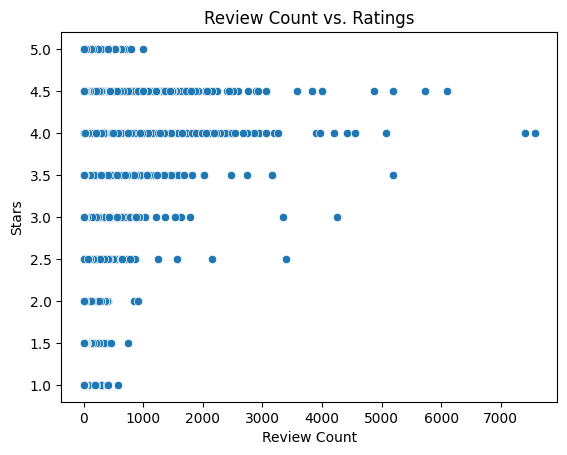

In [13]:
sns.scatterplot(x='review_count', y='stars', data=business)
plt.title('Review Count vs. Ratings')
plt.xlabel('Review Count')
plt.ylabel('Stars')
plt.show()

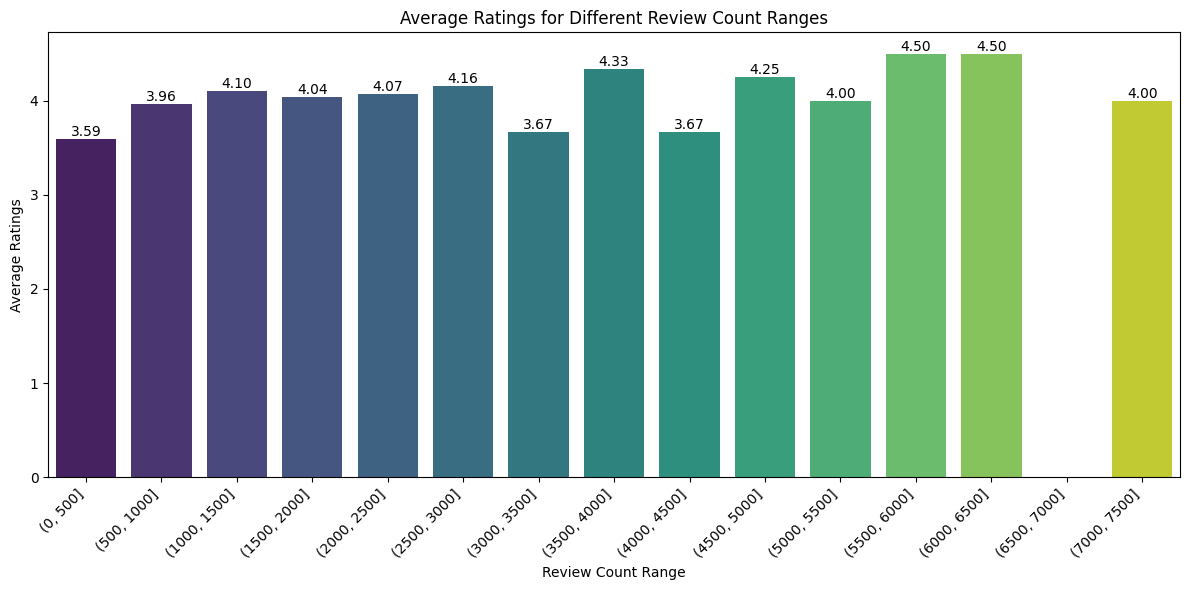

In [14]:
business['review_count_bins'] = pd.cut(business['review_count'], bins=pd.interval_range(start=0, end=business['review_count'].max() + 1, freq=500))

plt.figure(figsize=(12, 6))
ax = sns.barplot(x='review_count_bins', y='stars', data=business, ci=None, palette='viridis')

for p in ax.patches:
    ax.annotate(f'{p.get_height():.2f}', (p.get_x() + p.get_width() / 2., p.get_height()), ha='center', va='center', xytext=(0, 5), textcoords='offset points')

plt.title('Average Ratings for Different Review Count Ranges')
plt.xlabel('Review Count Range')
plt.ylabel('Average Ratings')
plt.xticks(rotation=45, ha='right') 
plt.tight_layout()
plt.show()

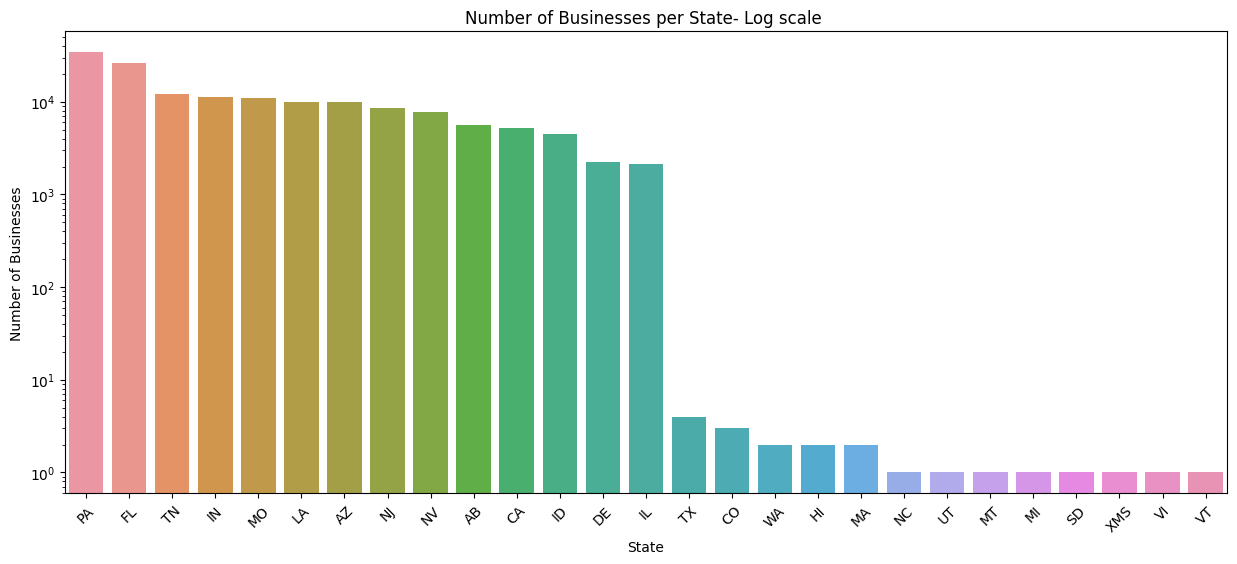

In [19]:
business_per_state = business['state'].value_counts()

plt.figure(figsize=(15, 6))
sns.barplot(x=business_per_state.index, y=business_per_state.values)
plt.yscale('log')
plt.title('Number of Businesses per State- Log scale ')
plt.xlabel('State')
plt.ylabel('Number of Businesses')
plt.xticks(rotation=45)
plt.show()

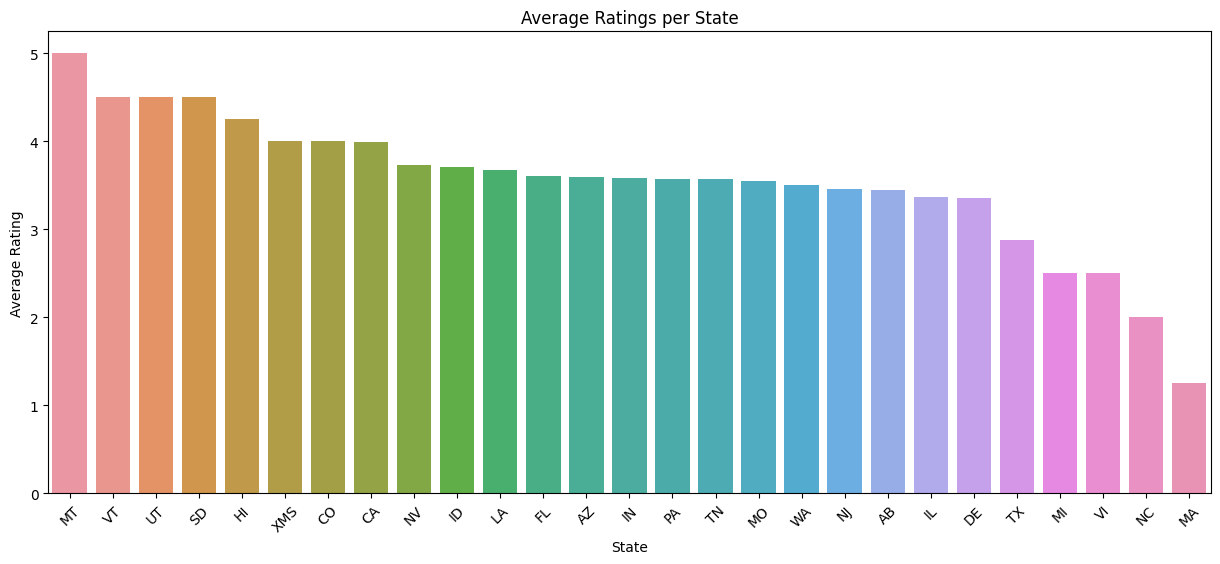

In [20]:
average_ratings_per_state = business.groupby('state')['stars'].mean().sort_values(ascending=False)

plt.figure(figsize=(15, 6))
sns.barplot(x=average_ratings_per_state.index, y=average_ratings_per_state.values)
plt.title('Average Ratings per State')
plt.xlabel('State')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.show()

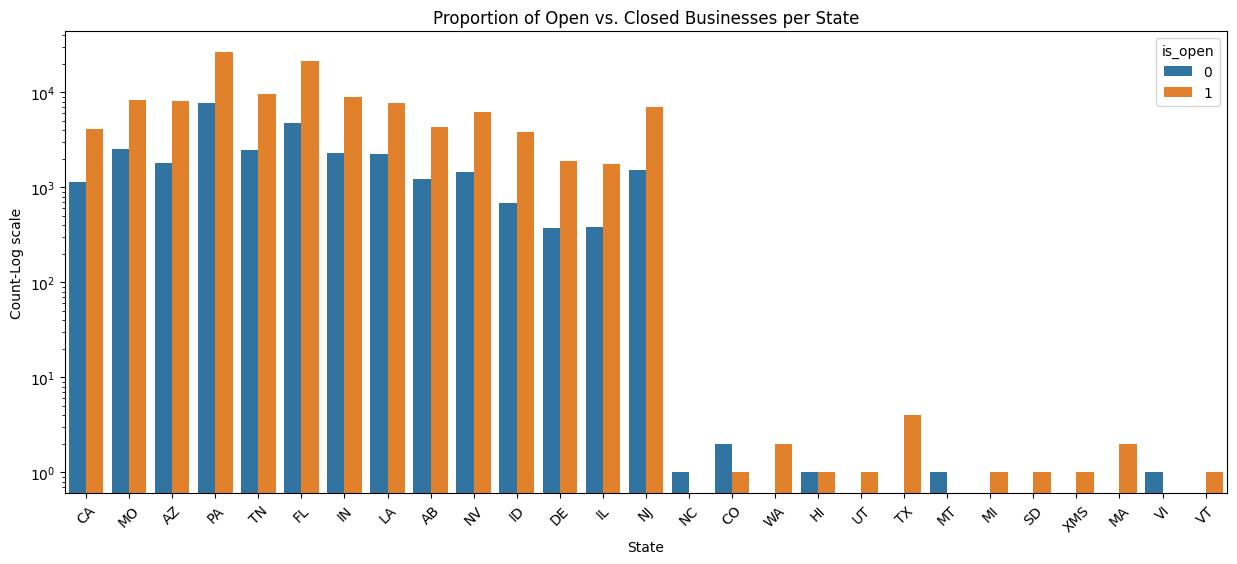

In [21]:
plt.figure(figsize=(15, 6))
sns.countplot(x='state', hue='is_open', data=business)
plt.title('Proportion of Open vs. Closed Businesses per State')
plt.yscale('log')
plt.xlabel('State')
plt.ylabel('Count-Log scale')
plt.xticks(rotation=45)
plt.show()

In [22]:
categories_split = business['categories'].str.split(', ', expand=True).stack()
categories_df = pd.DataFrame({'state': business['state'].iloc[categories_split.index.get_level_values(0)], 'category': categories_split.values})

top_three_categories_per_state = categories_df.groupby(['state', 'category']).size().reset_index(name='count')
top_three_categories_per_state = top_three_categories_per_state.groupby('state').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

top_three_categories_per_state['formatted_category'] = top_three_categories_per_state.groupby('state')['category'].transform(lambda x: ', '.join(x))
top_three_categories_per_state['formatted_category'] = '(' + top_three_categories_per_state['formatted_category'] + ')'

result_df = top_three_categories_per_state[['state', 'formatted_category']].drop_duplicates().reset_index(drop=True)
result_df.columns = ['State', 'Top Three Categories of Business']


In [23]:
result_df

,State,Top Three Categories of Business
0,AB,"(Restaurants, Food, Shopping)"
1,AZ,"(Restaurants, Shopping, Food)"
2,CA,"(Restaurants, Shopping, Food)"
3,CO,"(Buffets, Event Planning & Services, Outdoor G..."
4,DE,"(Restaurants, Food, Shopping)"
5,FL,"(Restaurants, Food, Shopping)"
6,HI,"(Beauty & Spas, Chiropractors, Cosmetic Surgeons)"
7,ID,"(Restaurants, Food, Shopping)"
8,IL,"(Restaurants, Food, Shopping)"
9,IN,"(Restaurants, Food, Shopping)"


In [24]:
categories_df['stars'] = business['stars'].iloc[categories_split.index.get_level_values(0)]

top_states_per_category = categories_df.groupby(['category', 'state'])['stars'].mean().round(2).reset_index(name='avg_rating')
top_states_per_category = top_states_per_category.groupby('category').apply(lambda x: x.nlargest(3, 'avg_rating')).reset_index(drop=True)

result_df_top_states = top_states_per_category[['category', 'state', 'avg_rating']]
result_df_top_states.columns = ['Category', 'State', 'Average Rating']


In [25]:
result_df_top_states.head()

,Category,State,Average Rating
0,& Probates,CA,5.0
1,& Probates,IN,5.0
2,& Probates,TN,5.0
3,3D Printing,LA,5.0
4,3D Printing,NV,4.5


In [27]:
print("Total number of distinct categories of business:",categories_df['category'].nunique())

Total number of distinct categories of business: 1312


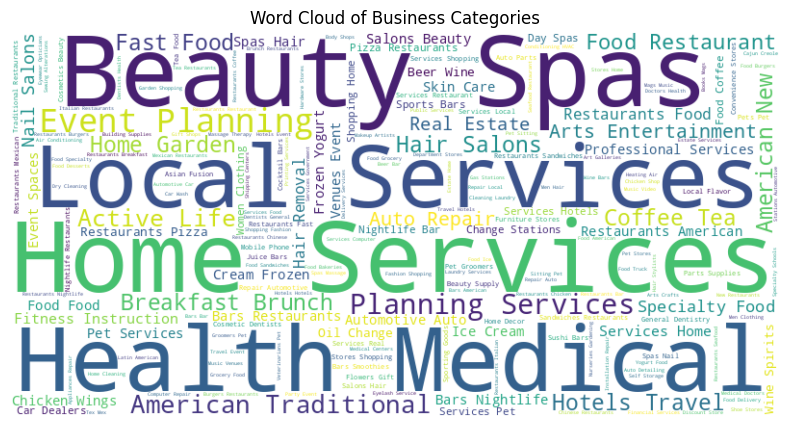

In [28]:
all_categories = ','.join(business['categories'].astype(str).values)
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(all_categories)

plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Word Cloud of Business Categories')
plt.show()

Text(0, 0.5, 'Count')

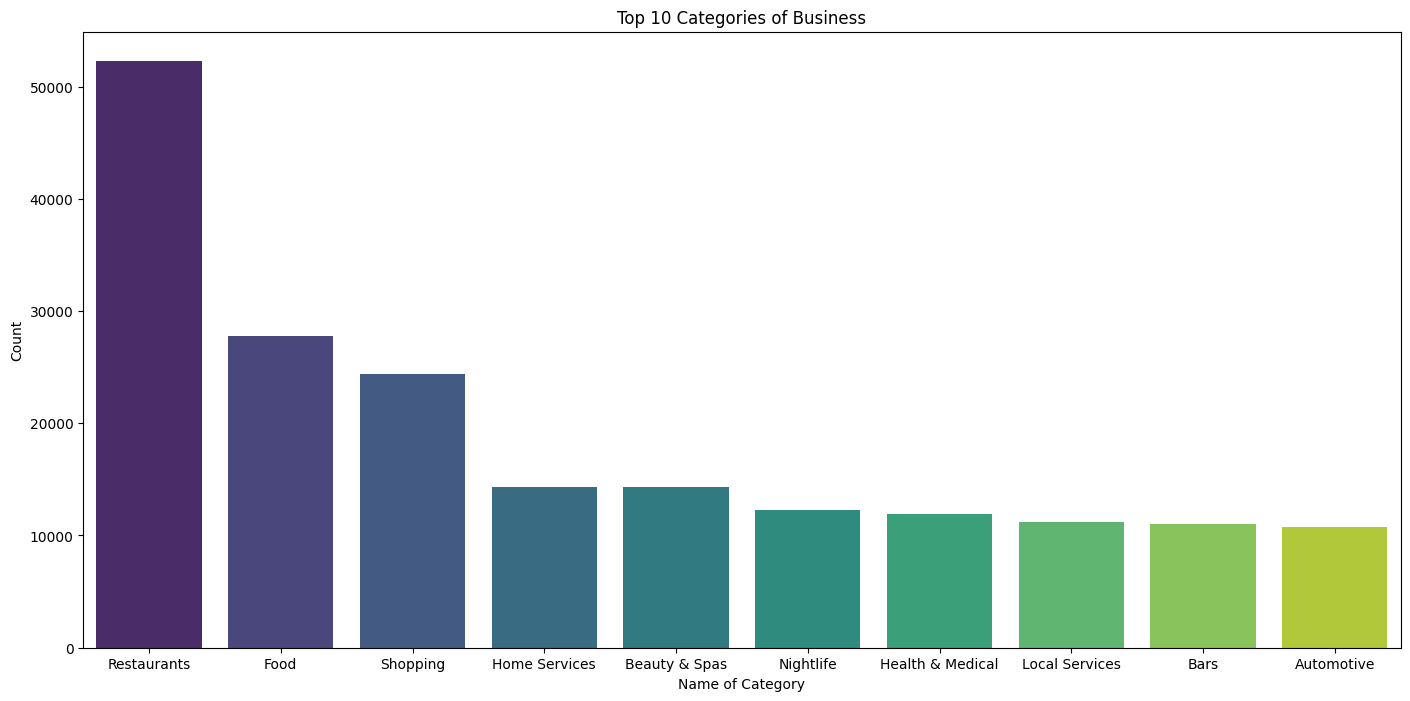

In [29]:
category_counts = categories_split.value_counts().reset_index()
category_counts.columns = ['Name', 'Count']

top_categories = category_counts.head(10)

plt.figure(figsize=(17, 8))
sns.barplot(x='Name', y='Count', data=top_categories, palette='viridis')
plt.title('Top 10 Categories of Business')
plt.xlabel('Name of Category')
plt.ylabel('Count')

Text(0.5, 0, 'City')

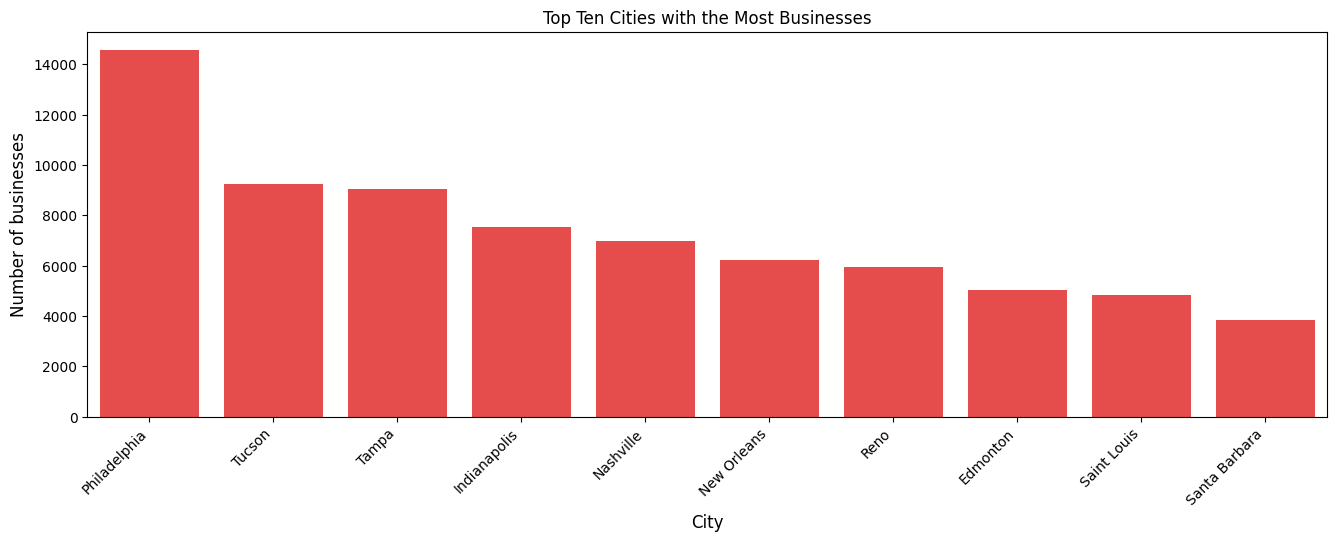

In [32]:
city_counts = business['city'].value_counts().sort_values(ascending=False)

top_ten_cities = city_counts.head(10)

plt.figure(figsize=(16, 5))
ax = sns.barplot(x=top_ten_cities.index, y=top_ten_cities.values, alpha=0.8, color='red')
plt.title("Top Ten Cities with the Most Businesses")
plt.xticks(rotation=45, ha='right')
plt.ylabel('Number of businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

Text(0.5, 0, 'City')

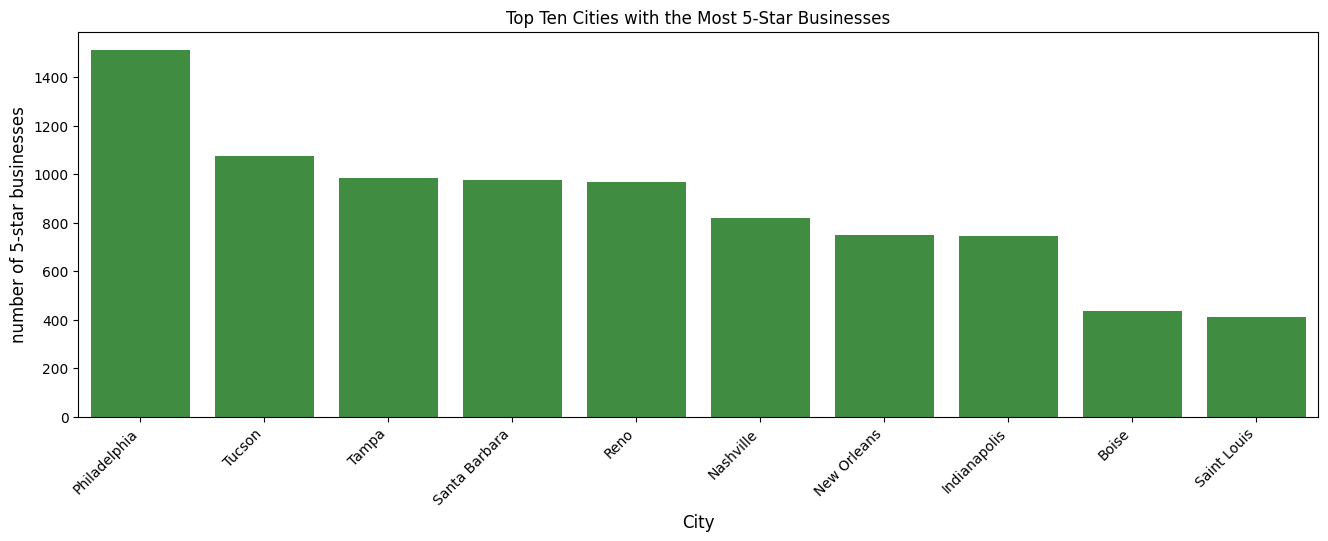

In [33]:
five_star_businesses = business[business['stars'] == 5]

city_counts_5_stars = five_star_businesses['city'].value_counts().sort_values(ascending=False)

top_ten_cities_5_stars = city_counts_5_stars.head(10)

plt.figure(figsize=(16, 5))
ax = sns.barplot(x=top_ten_cities_5_stars.index, y=top_ten_cities_5_stars.values, alpha=0.8, color='green')
plt.title("Top Ten Cities with the Most 5-Star Businesses")
plt.xticks(rotation=45, ha='right')
plt.ylabel('number of 5-star businesses', fontsize=12)
plt.xlabel('City', fontsize=12)

Text(0, 0.5, 'Business Name')

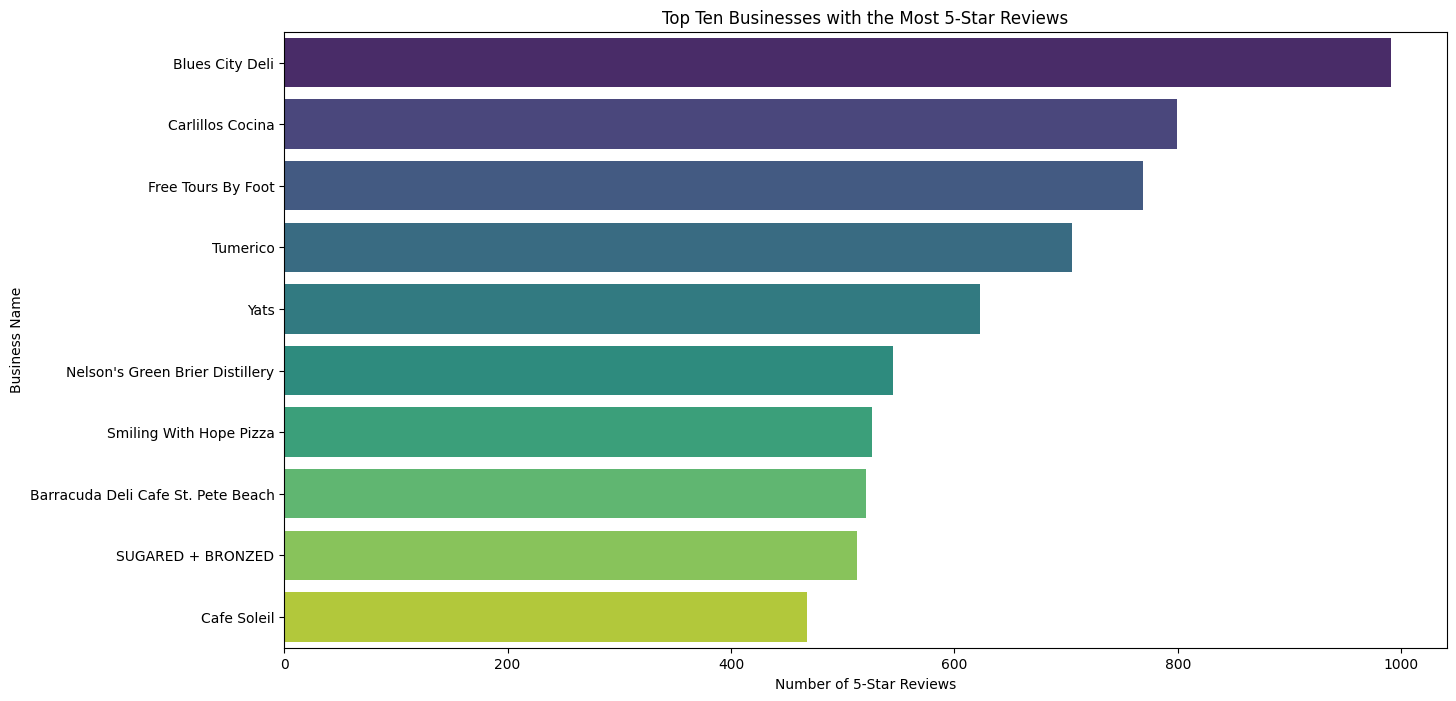

In [34]:
top_ten_5_star_businesses = five_star_businesses.sort_values(by='review_count', ascending=False).head(10)

plt.figure(figsize=(15, 8))
sns.barplot(x='review_count', y='name', data=top_ten_5_star_businesses, palette='viridis')
plt.title('Top Ten Businesses with the Most 5-Star Reviews')
plt.xlabel('Number of 5-Star Reviews')
plt.ylabel('Business Name')

# **REVIEW DATASET**

In [35]:
review.head()

,review_id,user_id,business_id,stars,useful,funny,cool,text,date
0,KU_O5udG6zpxOg-VcAEodg,mh_-eMZ6K5RLWhZyISBhwA,XQfwVwDr-v0ZS3_CbbE5Xw,3,0,0,0,"If you decide to eat here, just be aware it is...",2018-07-07 22:09:11
1,BiTunyQ73aT9WBnpR9DZGw,OyoGAe7OKpv6SyGZT5g77Q,7ATYjTIgM3jUlt4UM3IypQ,5,1,0,1,I've taken a lot of spin classes over the year...,2012-01-03 15:28:18
2,saUsX_uimxRlCVr67Z4Jig,8g_iMtfSiwikVnbP2etR0A,YjUWPpI6HXG530lwP-fb2A,3,0,0,0,Family diner. Had the buffet. Eclectic assortm...,2014-02-05 20:30:30
3,AqPFMleE6RsU23_auESxiA,_7bHUi9Uuf5__HHc_Q8guQ,kxX2SOes4o-D3ZQBkiMRfA,5,1,0,1,"Wow! Yummy, different, delicious. Our favo...",2015-01-04 00:01:03
4,Sx8TMOWLNuJBWer-0pcmoA,bcjbaE6dDog4jkNY91ncLQ,e4Vwtrqf-wpJfwesgvdgxQ,4,1,0,1,Cute interior and owner (?) gave us tour of up...,2017-01-14 20:54:15


In [36]:
review.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6990280 entries, 0 to 6990279
Data columns (total 9 columns):
 #   Column       Dtype         
---  ------       -----         
 0   review_id    object        
 1   user_id      object        
 2   business_id  object        
 3   stars        int64         
 4   useful       int64         
 5   funny        int64         
 6   cool         int64         
 7   text         object        
 8   date         datetime64[us]
dtypes: datetime64[us](1), int64(4), object(4)
memory usage: 480.0+ MB


In [37]:
review['date'] = pd.to_datetime(review['date'])

In [38]:
print(review.isnull().sum())

review_id      0
user_id        0
business_id    0
stars          0
useful         0
funny          0
cool           0
text           0
date           0
dtype: int64


In [39]:
review.describe()

,stars,useful,funny,cool,date
count,6.990280e+06,6.990280e+06,6.990280e+06,6.990280e+06,6990280
mean,3.748584e+00,1.184609e+00,3.265596e-01,4.986175e-01,2017-01-11 11:22:33.441782
min,1.000000e+00,-1.000000e+00,-1.000000e+00,-1.000000e+00,2005-02-16 03:23:22
25%,3.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2015-01-25 04:53:50.250000
50%,4.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,2017-06-03 01:26:07
75%,5.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,2019-05-23 00:02:46.250000
max,5.000000e+00,1.182000e+03,7.920000e+02,4.040000e+02,2022-01-19 19:48:45
std,1.478705e+00,3.253767e+00,1.688729e+00,2.172460e+00,NaN


In [40]:
distinct_values_per_column_review = review[['useful','funny','cool']].nunique()

print("Total number of distinct values in each column:\n")
print(distinct_values_per_column_review)

Total number of distinct values in each column:

useful    259
funny     201
cool      210
dtype: int64


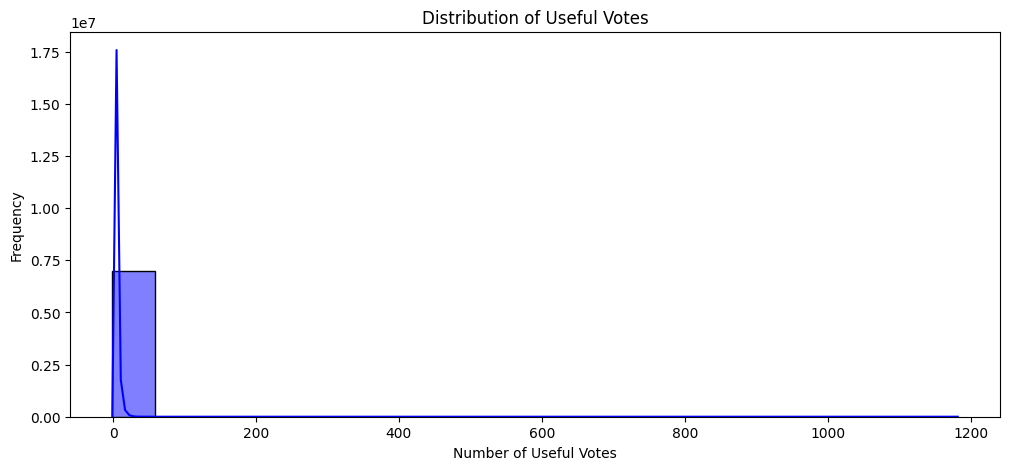

In [41]:
plt.figure(figsize=(12, 5))
sns.histplot(review['useful'], bins=20, kde=True, color='blue')
plt.title('Distribution of Useful Votes')
plt.xlabel('Number of Useful Votes')
plt.ylabel('Frequency')
plt.show()

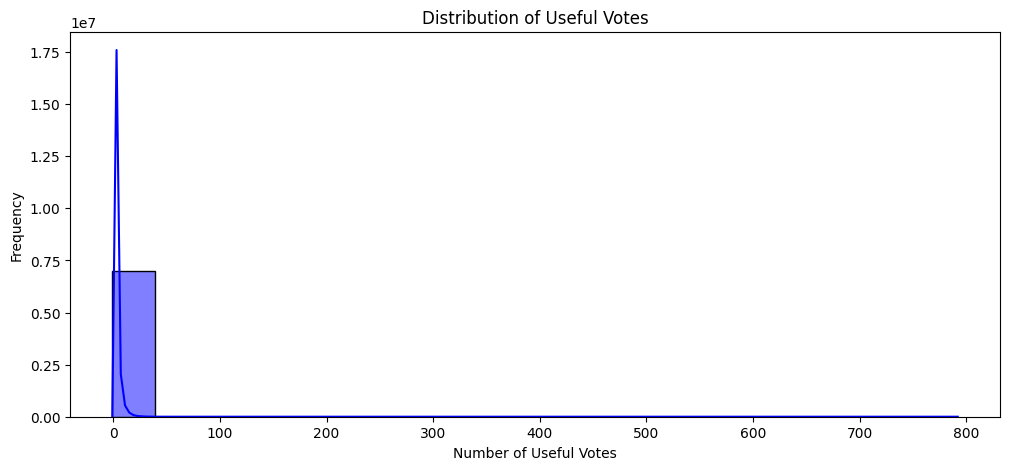

In [42]:
plt.figure(figsize=(12, 5))
sns.histplot(review['funny'], bins=20, kde=True, color='blue')
plt.title('Distribution of Useful Votes')
plt.xlabel('Number of Useful Votes')
plt.ylabel('Frequency')
plt.show()

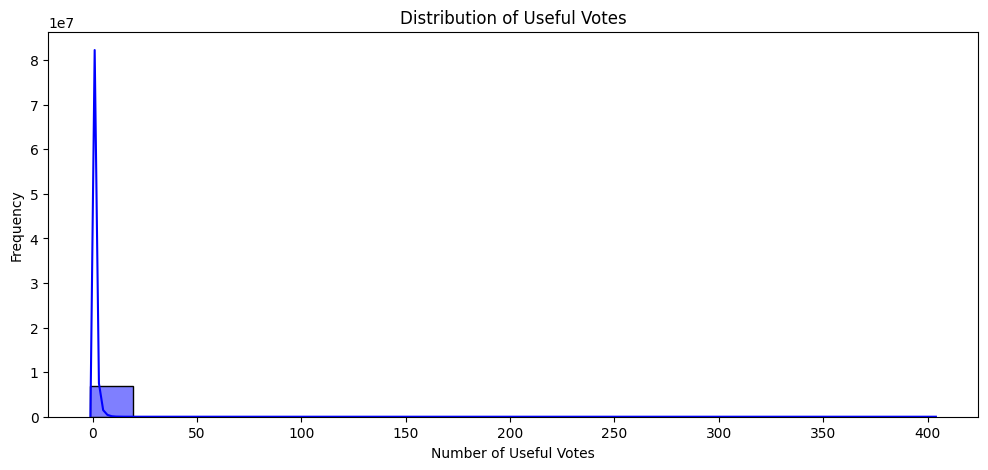

In [43]:
plt.figure(figsize=(12, 5))
sns.histplot(review['cool'], bins=20, kde=True, color='blue')
plt.title('Distribution of Useful Votes')
plt.xlabel('Number of Useful Votes')
plt.ylabel('Frequency')
plt.show()

**Inference:**
The distribution of useful, funny, and cool votes is left-skewed, where most values are 0 and the nonzero values are relatively close together to 0, it suggests that the reviews made by the users where not found useful, funny or cool by the general public. The majority of users did not receive many votes in these categories.

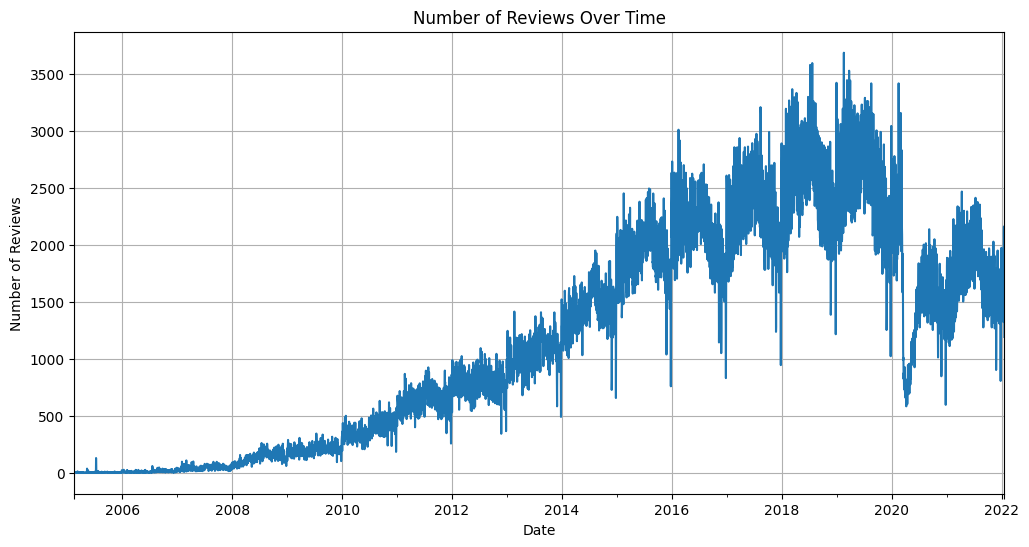

In [81]:
plt.figure(figsize=(12, 6))
review.resample('D', on='date').size().plot()
plt.title('Number of Reviews Over Time')
plt.xlabel('Date')
plt.ylabel('Number of Reviews')
plt.grid(True)
plt.show()

**INFERENCE:**
The significant drop in the number of reviews around 2020 could be attributed to the impact of the COVID-19 pandemic. The pandemic, characterized by widespread lockdowns and restrictions imposed to curb the spread of the virus, likely resulted in the closure or reduced operations of many businesses. As a consequence, fewer people were actively searching for or engaging with businesses during this period, leading to a noticeable decline in reviews.

# **USER DATASET**

In [44]:
user.head()

,user_id,name,review_count,yelping_since,useful,funny,cool,elite,friends,fans,...,compliment_more,compliment_profile,compliment_cute,compliment_list,compliment_note,compliment_plain,compliment_cool,compliment_funny,compliment_writer,compliment_photos
0,qVc8ODYU5SZjKXVBgXdI7w,Walker,585,2007-01-25 16:47:26,7217,1259,5994,2007,"NSCy54eWehBJyZdG2iE84w, pe42u7DcCH2QmI81NX-8qA...",267,...,65,55,56,18,232,844,467,467,239,180
1,j14WgRoU_-2ZE1aw1dXrJg,Daniel,4333,2009-01-25 04:35:42,43091,13066,27281,"2009,2010,2011,2012,2013,2014,2015,2016,2017,2...","ueRPE0CX75ePGMqOFVj6IQ, 52oH4DrRvzzl8wh5UXyU0A...",3138,...,264,184,157,251,1847,7054,3131,3131,1521,1946
2,2WnXYQFK0hXEoTxPtV2zvg,Steph,665,2008-07-25 10:41:00,2086,1010,1003,"2009,2010,2011,2012,2013","LuO3Bn4f3rlhyHIaNfTlnA, j9B4XdHUhDfTKVecyWQgyA...",52,...,13,10,17,3,66,96,119,119,35,18
3,SZDeASXq7o05mMNLshsdIA,Gwen,224,2005-11-29 04:38:33,512,330,299,"2009,2010,2011","enx1vVPnfdNUdPho6PH_wg, 4wOcvMLtU6a9Lslggq74Vg...",28,...,4,1,6,2,12,16,26,26,10,9
4,hA5lMy-EnncsH4JoR-hFGQ,Karen,79,2007-01-05 19:40:59,29,15,7,,"PBK4q9KEEBHhFvSXCUirIw, 3FWPpM7KU1gXeOM_ZbYMbA...",1,...,1,0,0,0,1,1,0,0,0,0


In [45]:
user.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1987897 entries, 0 to 1987896
Data columns (total 22 columns):
 #   Column              Dtype  
---  ------              -----  
 0   user_id             object 
 1   name                object 
 2   review_count        int64  
 3   yelping_since       object 
 4   useful              int64  
 5   funny               int64  
 6   cool                int64  
 7   elite               object 
 8   friends             object 
 9   fans                int64  
 10  average_stars       float64
 11  compliment_hot      int64  
 12  compliment_more     int64  
 13  compliment_profile  int64  
 14  compliment_cute     int64  
 15  compliment_list     int64  
 16  compliment_note     int64  
 17  compliment_plain    int64  
 18  compliment_cool     int64  
 19  compliment_funny    int64  
 20  compliment_writer   int64  
 21  compliment_photos   int64  
dtypes: float64(1), int64(16), object(5)
memory usage: 333.7+ MB


In [46]:
user['yelping_since'] = pd.to_datetime(user['yelping_since'])

In [49]:
user.isnull().sum()

user_id               0
name                  0
review_count          0
yelping_since         0
useful                0
funny                 0
cool                  0
elite                 0
friends               0
fans                  0
average_stars         0
compliment_hot        0
compliment_more       0
compliment_profile    0
compliment_cute       0
compliment_list       0
compliment_note       0
compliment_plain      0
compliment_cool       0
compliment_funny      0
compliment_writer     0
compliment_photos     0
dtype: int64

In [51]:
freq_users = review['user_id'].value_counts().head(10).reset_index()
freq_users.columns = ['user_id', 'review_count']

freq_users = pd.merge(freq_users, user[['user_id', 'name', 'useful', 'funny', 'cool', 'fans']], on='user_id', how='left')
freq_users = freq_users[['user_id', 'name', 'review_count','fans','useful', 'funny', 'cool']]

In [52]:
freq_users

,user_id,name,review_count,fans,useful,funny,cool
0,_BcWyKQL16ndpBdggh2kNA,Karen,3048,558,16950,5203,9759
1,Xw7ZjaGfr0WNVt6s_5KZfA,Marielle,1840,379,15105,6729,9532
2,0Igx-a1wAstiBDerGxXk2A,Jen,1747,200,13793,5457,8701
3,-G7Zkl1wIWBBmD0KRy_sCw,Gerald,1682,703,61899,31999,48327
4,ET8n-r7glWYqZhuR6GcdNw,Michelle,1653,1353,28235,8198,18687
5,bYENop4BuQepBjM1-BI3fA,Steven,1578,401,15230,5475,11599
6,1HM81n6n4iPIFU5d2Lokhw,Shannon,1554,149,8966,3550,5019
7,fr1Hz2acAb3OaL3l6DyKNg,Boon,1447,387,31200,9602,27824
8,wXdbkFZsfDR7utJvbWElyA,Ken,1396,250,11836,842,6960
9,Um5bfs5DH6eizgjH3xZsvg,Dianna,1391,203,10382,4927,8225


In [55]:
user['total_score'] = user['useful'] + user['funny'] + user['cool']

top_overall_users = user.nlargest(10, 'total_score')[['user_id', 'name', 'useful', 'funny', 'cool', 'fans']].reset_index(drop=True)

In [56]:
top_overall_users

,user_id,name,useful,funny,cool,fans
0,Hi10sGSZNxQH3NLyWSZ1oA,Fox,206296,185823,195814,3493
1,--2vR0DIsmQ6WfcSzKWigw,Harald,205765,173096,199878,880
2,JjXuiru1_ONzDkYVrHN0aw,Richard,183512,129638,173423,3243
3,hWDybu_KvYLSdEFzGrniTw,Bruce,173089,98459,144849,867
4,lvthTfCQGD0qaEk6jCdRdQ,Ariel,182788,54132,162667,808
5,8k3aO-mPeyhbR5HUucA5aA,Victor,152979,84992,125516,1462
6,Kf5PVQUdDvQYf-MXoeWqZA,Marianne,142453,81937,136166,1021
7,AbMjnKOwg736fcIu8apuyQ,Michael,124311,91842,113069,1563
8,7W-p-PJlmrzg0mk3pWKoyQ,Arshad,117066,96505,113371,597
9,ax7SnXOTIpatbsmqHLqVow,Rohlin,112557,103618,107338,605


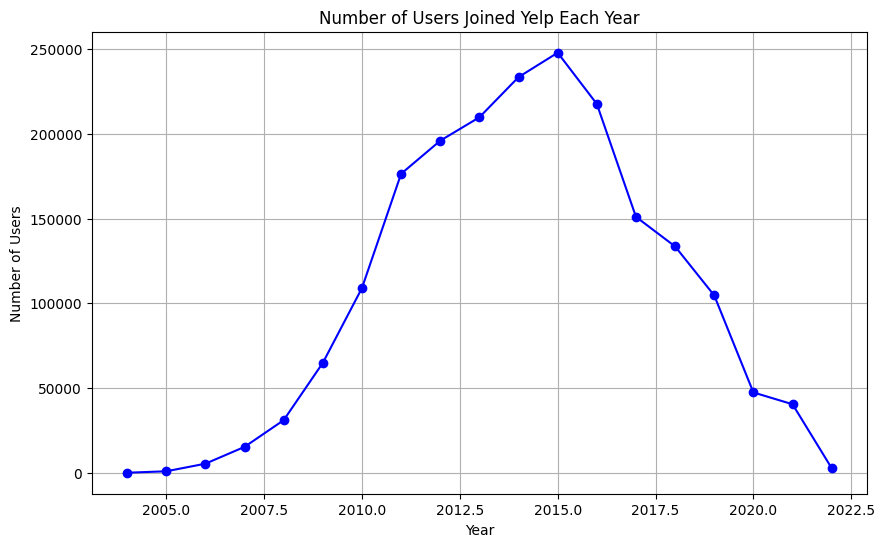

In [57]:
users_by_year = user['yelping_since'].dt.year.value_counts().sort_index()

plt.figure(figsize=(10, 6))
plt.plot(users_by_year.index, users_by_year.values, marker='o', linestyle='-', color='b')
plt.title('Number of Users Joined Yelp Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Users')
plt.grid(True)
plt.show()

# **CHECKIN DATASET**

In [63]:
checkin.head()

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,"2020-03-13 21:10:56, 2020-06-02 22:18:06, 2020..."
1,--0iUa4sNDFiZFrAdIWhZQ,"2010-09-13 21:43:09, 2011-05-04 23:08:15, 2011..."
2,--30_8IhuyMHbSOcNWd6DQ,"2013-06-14 23:29:17, 2014-08-13 23:20:22"
3,--7PUidqRWpRSpXebiyxTg,"2011-02-15 17:12:00, 2011-07-28 02:46:10, 2012..."
4,--7jw19RH9JKXgFohspgQw,"2014-04-21 20:42:11, 2014-04-28 21:04:46, 2014..."


In [64]:
checkin.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 131930 entries, 0 to 131929
Data columns (total 2 columns):
 #   Column       Non-Null Count   Dtype 
---  ------       --------------   ----- 
 0   business_id  131930 non-null  object
 1   date         131930 non-null  object
dtypes: object(2)
memory usage: 2.0+ MB


In [65]:
checkin['date'] = checkin['date'].str.split(', ')
checkin = checkin.explode('date')
checkin['date'] = pd.to_datetime(checkin['date'], format='%Y-%m-%d %H:%M:%S')

In [66]:
checkin.isnull().sum()

business_id    0
date           0
dtype: int64

In [67]:
checkin.shape

(13356875, 2)

In [69]:
checkin.head(15)

,business_id,date
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56
0,---kPU91CF4Lq2-WlRu9Lw,2020-06-02 22:18:06
0,---kPU91CF4Lq2-WlRu9Lw,2020-07-24 22:42:27
0,---kPU91CF4Lq2-WlRu9Lw,2020-10-24 21:36:13
0,---kPU91CF4Lq2-WlRu9Lw,2020-12-09 21:23:33
0,---kPU91CF4Lq2-WlRu9Lw,2021-01-20 17:34:57
0,---kPU91CF4Lq2-WlRu9Lw,2021-04-30 21:02:03
0,---kPU91CF4Lq2-WlRu9Lw,2021-05-25 21:16:54
0,---kPU91CF4Lq2-WlRu9Lw,2021-08-06 21:08:08
0,---kPU91CF4Lq2-WlRu9Lw,2021-10-02 15:15:42


In [70]:
oldest_newest_dates = checkin.groupby('business_id')['date'].agg(['min', 'max']).reset_index()

oldest_newest_dates.head()

,business_id,min,max
0,---kPU91CF4Lq2-WlRu9Lw,2020-03-13 21:10:56,2021-11-11 16:23:50
1,--0iUa4sNDFiZFrAdIWhZQ,2010-09-13 21:43:09,2014-04-12 23:04:47
2,--30_8IhuyMHbSOcNWd6DQ,2013-06-14 23:29:17,2014-08-13 23:20:22
3,--7PUidqRWpRSpXebiyxTg,2011-02-15 17:12:00,2015-09-27 13:18:32
4,--7jw19RH9JKXgFohspgQw,2014-04-21 20:42:11,2021-06-21 19:59:50


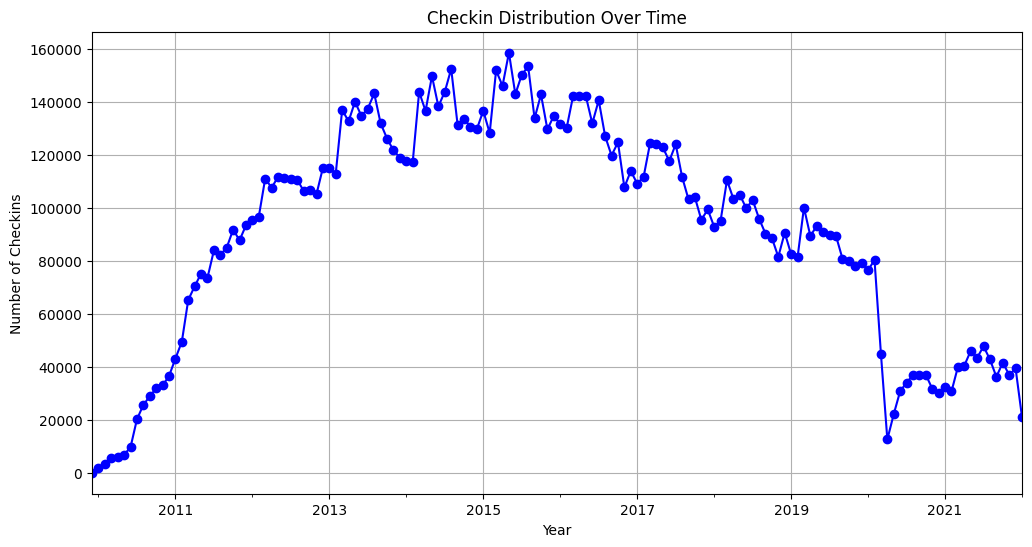

In [71]:
checkin['month_year'] = checkin['date'].dt.to_period('M')
checkin_counts = checkin['month_year'].value_counts().sort_index()

plt.figure(figsize=(12, 6))
checkin_counts.plot(kind='line', marker='o', linestyle='-', color='b')

plt.title('Checkin Distribution Over Time')
plt.xlabel('Year')
plt.ylabel('Number of Checkins')
plt.grid(True)
plt.show()

**INFERENCE:**
The sharp decrease in check-ins in 2020 likely corresponds to the impact of the COVID-19 pandemic. The implementation of lockdowns, social distancing measures, and the general public's reluctance to engage in public spaces during the pandemic could have significantly reduced the overall foot traffic and social interactions at businesses. As a result, people were less inclined to check in at various establishments, leading to the observed downward trend in check-ins. 

In [72]:
checkin['hour'] = checkin['date'].dt.hour
checkin['day_of_week'] = checkin['date'].dt.day_name()

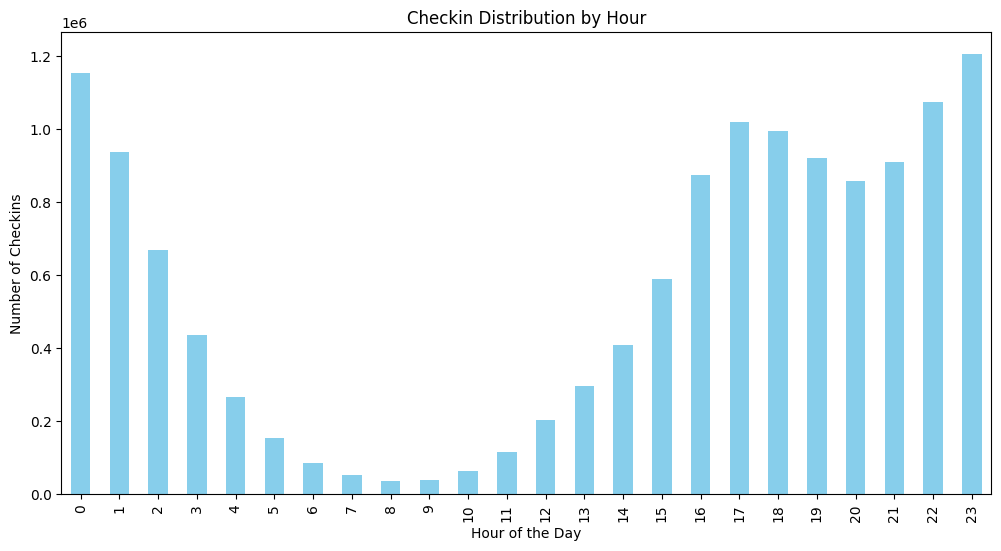

In [73]:
plt.figure(figsize=(12, 6))
checkin.groupby('hour').size().plot(kind='bar', color='skyblue')
plt.title('Checkin Distribution by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Checkins')
plt.show()


**INFERENCE:** 
The check-in distribution over the hours reveals distinct patterns in daily activity. The low check-in counts during the early morning hours, specifically between 5 am and 10 am, suggest that businesses experience minimal customer engagement during this period. This can be attributed to the fact that most establishments are either closed or have limited operational hours during the early morning.



The gradual increase in check-ins throughout the day, reaching a peak around midnight, indicates a surge in social interactions and business activities during the evening and nighttime hours. This aligns with typical patterns of increased social gatherings, dining, and entertainment options during the evening. The decline after midnight is expected as businesses start closing, and fewer people engage in activities that involve checking in at establishments.

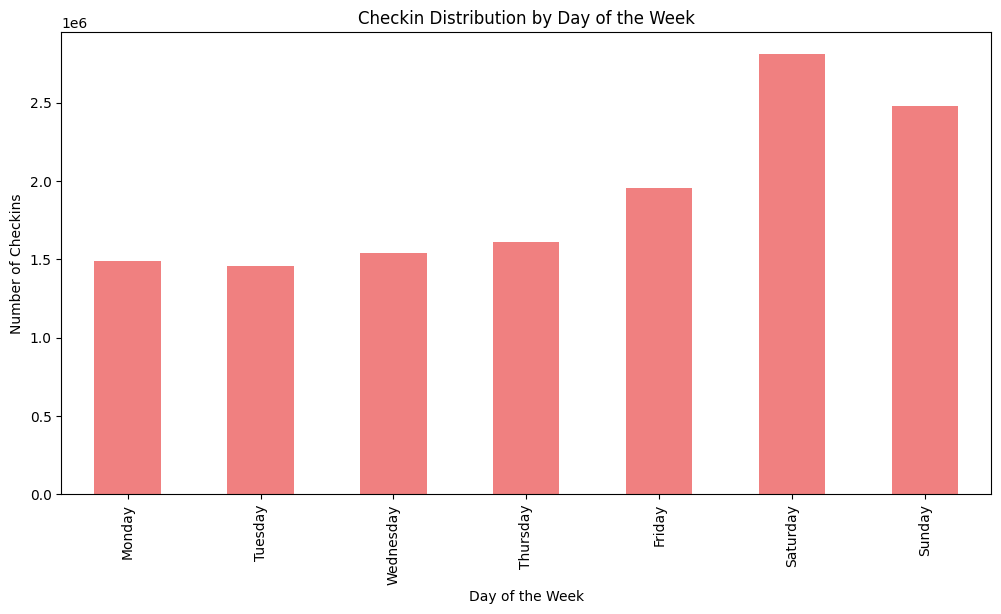

In [74]:
day_order = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturday", "Sunday"]
checkin['day_of_week'] = pd.Categorical(checkin['day_of_week'], categories=day_order, ordered=True)

plt.figure(figsize=(12, 6))
checkin.groupby('day_of_week').size().plot(kind='bar', color='lightcoral')
plt.title('Checkin Distribution by Day of the Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Checkins')
plt.show()

**INFERENCE:**
The check-in distribution across days of the week indicates a noticeable trend in customer engagement over the week. Starting from Monday, there is a gradual increase in check-ins, reaching a peak on Saturday. This pattern suggests that businesses experience heightened customer activity during the latter part of the workweek and into the weekend.

The slight reduction in check-ins on Sunday may be attributed to a combination of factors, including potential business closures, reduced working hours, and individuals spending more time with family or engaging in leisure activities.

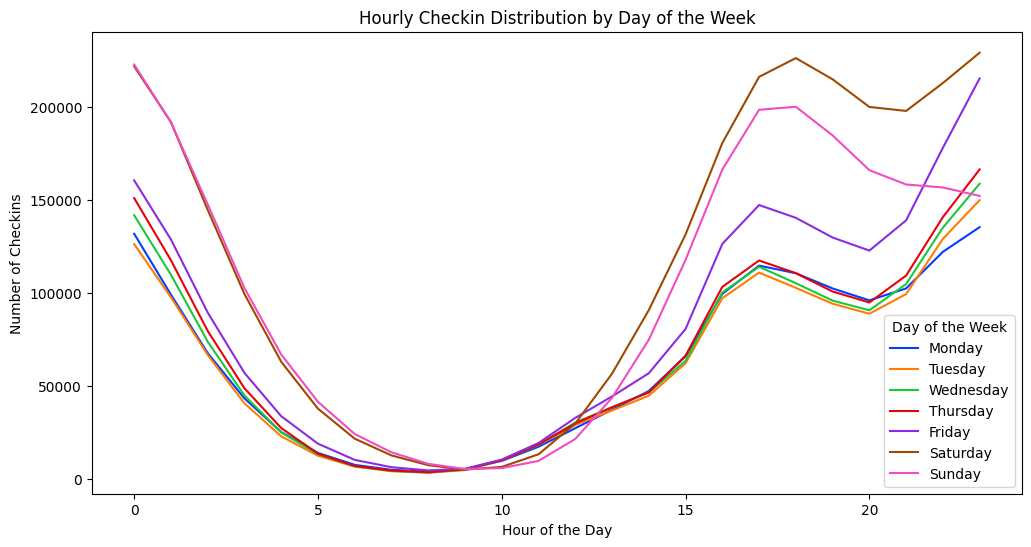

In [75]:
plt.figure(figsize=(12, 6))
sns.lineplot(x='hour', y='count', hue='day_of_week', data=checkin.groupby(['day_of_week', 'hour']).size().reset_index(name='count'), palette='bright')
plt.title('Hourly Checkin Distribution by Day of the Week')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Checkins')
plt.legend(title='Day of the Week')
plt.show()

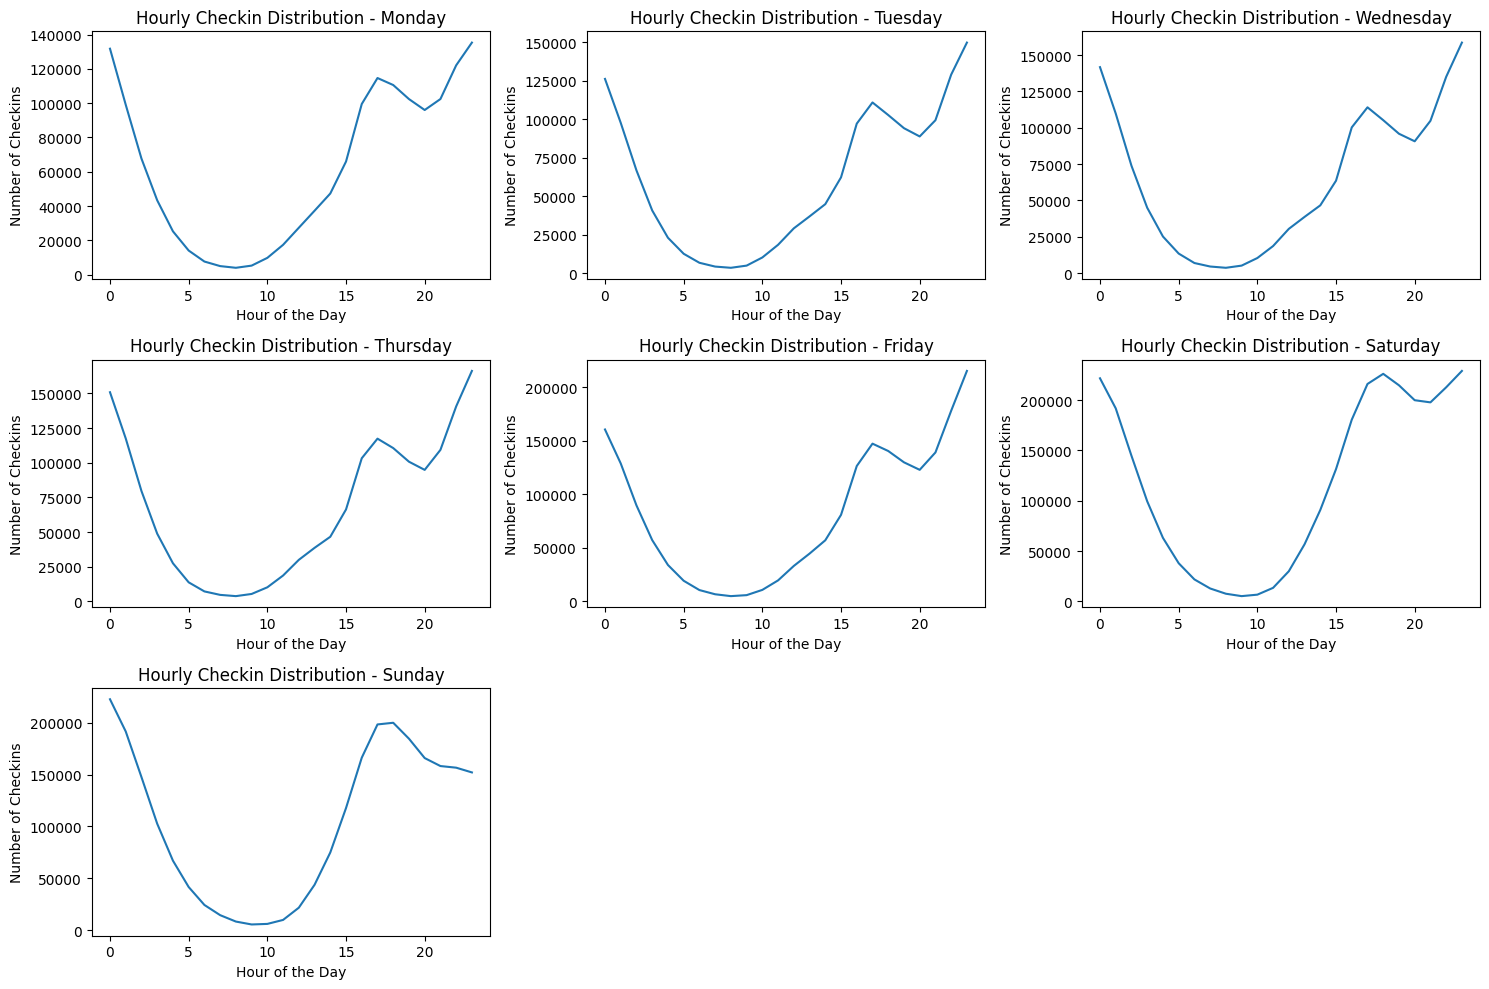

In [76]:
plt.figure(figsize=(15, 10))

for i, day in enumerate(day_order, 1):
    plt.subplot(3, 3, i)
    sns.lineplot(x='hour', y='count', data=checkin[checkin['day_of_week'] == day].groupby('hour').size().reset_index(name='count'))
    plt.title(f'Hourly Checkin Distribution - {day}')
    plt.xlabel('Hour of the Day')
    plt.ylabel('Number of Checkins')

plt.tight_layout()
plt.show()

# **GEO-SPATIAL MAPPING**

In [77]:
import folium
from folium.plugins import MarkerCluster
from IPython.display import display

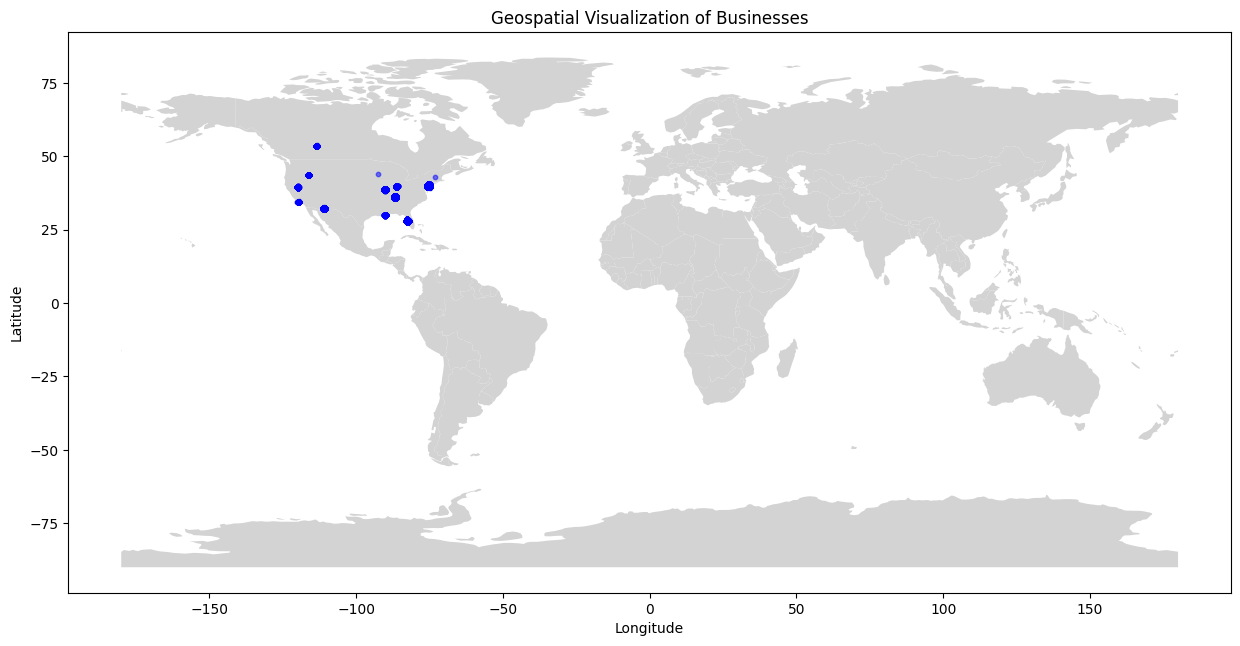

In [78]:
geometry = gpd.points_from_xy(business['longitude'], business['latitude'])
geo_df = gpd.GeoDataFrame(business, geometry=geometry)

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))
fig, ax = plt.subplots(figsize=(15, 10))
world.plot(ax=ax, color='lightgray')

geo_df.plot(ax=ax, markersize=10, color='blue', alpha=0.5)

plt.title('Geospatial Visualization of Businesses')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()


In [80]:
map_center = [business['latitude'].mean(), business['longitude'].mean()]

m = folium.Map(location=map_center, zoom_start=12)
marker_cluster = MarkerCluster().add_to(m)

def add_marker(row):
    popup_text = f"{row['name']} - Rating: {row['stars']}"
    marker = folium.Marker(location=[row['latitude'], row['longitude']], popup=popup_text, 
                           tooltip=row['name'])
    marker.add_to(marker_cluster)

business.apply(add_marker, axis=1)
m.save('map.html')

In [5]:
import os

# **WHY PARQUET ??**

Parquet is a columnar storage file format that is designed to provide efficient storage and processing of large datasets, particularly in distributed computing environments.It is generally used with big data processing frameworks.
Some of the characteristics of Parquet are:

In [9]:
file_path = '/kaggle/input/yelp-csv/yelp_review.csv'
file_size_bytes = os.path.getsize(file_path)
file_size_gb = file_size_bytes / (1024 ** 3)

print(f'The file size (CSV) is approximately {file_size_gb:.2f} GB')

The file size (CSV) is approximately 3.53 GB


# **Compression**

Parquet supports various compression algorithms, providing high compression ratios and reducing storage requirements.
For example, the size of the Review dataset as s parquet file is reduced by 20% when compared to it's CSV counterpart

In [10]:
file_path = '/kaggle/input/yelp-parquet/yelp_academic_dataset_review.parquet'
file_size_bytes = os.path.getsize(file_path)
file_size_gb = file_size_bytes / (1024 ** 3)

print(f'The file size (parquet) is approximately {file_size_gb:.2f} GB')

The file size (parquet) is approximately 2.84 GB


# **Performance**

Parquet stores data in a columnar format rather than a row-based format. This allows for better compression and efficient retrieval of specific columns, which is particularly beneficial for analytics and data processing.The columnar layout allows for better performance in terms of both read and write operations, making Parquet a preferred choice for big data processing.

**CSV FILES EXECUTION TIME**

In [85]:
%timeit pd.read_csv('/kaggle/input/yelp-csv/yelp_business.csv')
%timeit pd.read_csv('/kaggle/input/yelp-csv/yelp_checkin.csv')
%timeit pd.read_csv('/kaggle/input/yelp-csv/yelp_review.csv')
%timeit pd.read_csv('/kaggle/input/yelp-csv/yelp_tip.csv')
%timeit pd.read_csv('/kaggle/input/yelp-csv/yelp_user.csv')

1.13 s ± 18.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
4.14 s ± 30.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1min 2s ± 472 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
3.56 s ± 27.3 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
18.7 s ± 171 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


**PARQUET FILES EXECUTION TIME**

In [3]:
%timeit pd.read_parquet('/kaggle/input/yelp-parquet/yelp_academic_dataset_business.parquet')
%timeit pd.read_parquet('/kaggle/input/yelp-parquet/yelp_academic_dataset_checkin.parquet')
%timeit pd.read_parquet('/kaggle/input/yelp-parquet/yelp_academic_dataset_tip.parquet')
%timeit pd.read_parquet('/kaggle/input/yelp-parquet/yelp_academic_dataset_user.parquet')

#could not do review dataset because the notebook could not handle the computation

352 ms ± 21 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.28 s ± 63.1 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
1.45 s ± 47.7 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
15.6 s ± 1 s per loop (mean ± std. dev. of 7 runs, 1 loop each)
